<font color='#EE2FEB'><h1>CONTANTS</h1></font>
- Setup
- Vanishing/Exploding Gradients Problems
  - Glorot and He Initialization   
  - Non-saturating Activation function
  
    <font color='#1177EB'>**(1) Leaky ReLU**</h3></font>
    - Train a neural network on Fashion MNIST using the Leaky ReLU   
  
    <font color='#1177EB'>**(2) Exponential Linear Unit (ELU)** </h3></font>
    - Train a neural network on Fashion MNIST using the ELU 
    
    <font color='#1177EB'>**(3) Self-normalize Exponential Linear Unit (ELU)** </h3></font>
    - Train a neural network on Fashion MNIST using the SELU 

    <font color='#1177EB'>**(4) Rectifier Linear Unit (ELU)** </h3></font>
    - Train a neural network on Fashion MNIST using the ReLU 

  - Batch Normalization
  - Gradient Clipping   
- Reusing Pretrained Layers
  - Transfer Learning With Keras
  - Unsupervised Pretraining
  - Pretraining on an Auxiliary Task
- Optimizers
  1. Gradient Desent
  2. Stochastic Gradient Desent
  3. Mini-batch Gradient Desent
  4. Adaptive Optimizers

    4.1 Momentum Optimization

    4.2 Nesterov Accelerated Gradient

    4.3 AdaGrad

    4.4 AdaDelta

    4.5 RMSProp

    4.6 Adam 

    4.7 Nadam 
  - Optimizers Behaviours Graph
  
- Learning Rate Scheduling
   - Power Scheduling
   - Exponential Scheduling
   - Piecewise Constant Scheduling
   - Performance Scheduling

- Avoiding Overfitting Through Regularization 
  - ℓ1 and ℓ2 Regularization
  - Dropout Regularization
     - AlphaDropout
     - Monte-Carlo (MC) Dropout 
  - Max-Norm Regularization


#<font color='#169DE3'>Setup</font> 



In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#<font color='#169DE3'>Vanishing/Exploding Gradients Problem.</font> 

A logistic neuron is said to be saturated when you plug in a large positive number logistic function becomes 1 and a large negative number logistic function becomes 0. As a result, the derivative of the logistic function would be equal to zero at the saturated point. 

**As a result, there will be no updating of weights**


##<font color='#E38916'>Logistic Function</font> 

In the logistic sigmoid function, a small change in the input only causes a small change in the output as opposed to the stepped output. Hence the output is much smoother than the step function output.
- The mathematical form of the logistic function
$$f(x) = \frac{1}{1+e^-x}$$

The sigmoid function is continuous and easily differentiable hence we can easily use a logistic function to update weights during backpropagation.
- The mathematical form of the derivative logistic function
$$f^{'}(x) =f(x)(1-f(x))$$

DrawBack:
- logistic function has become less popular in recent days because of vanishing gradient.
- The logistic function is computationally expensive because of the exponential term in the function.


In [ ]:
def logit(z):
  return 1/ (1 + np.exp(-z))

In [ ]:
!pip install qtpy

Saving figure sigmoid_saturation_plot


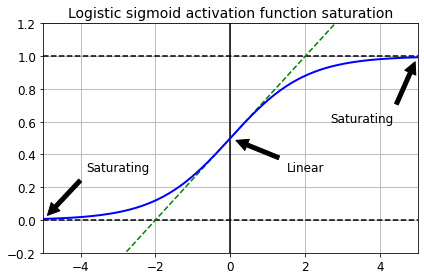

In [ ]:
# plot the sigmoid activation function
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), 'b-', linewidth = 2)

props = dict(facecolor = 'k',  shrink = 0.1)

plt.annotate('Saturating', xytext = (3.5, 0.6), xy = (5,1), arrowprops = props, fontsize = 12, ha = 'center')
plt.annotate('Saturating', xytext = (-3, 0.3), xy = (-5,0), arrowprops = props, fontsize = 12, ha = 'center')
plt.annotate('Linear',xytext = (2, 0.3), xy = (0, 0.5), arrowprops = props, fontsize = 12, ha = 'center')

plt.grid(True)
plt.title("Logistic sigmoid activation function saturation", fontsize = 14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig('sigmoid_saturation_plot')
plt.show()


##<font color='#E38916'> Xavier and He Initialization </font> 


In [ ]:
[name for name in dir(keras.initializers) if not name.startswith('_')]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

###  He initialization
The initialization strategy for the ReLU activation function is sometimes called   


- By default, Keras uses Glorot initialization with a uniform distribution. You can change this to He initialization by setting `kernel_initializer="he_uniform"` or `ker nel_initializer="he_normal"` 

- If you want He initialization with a uniform distribution, but based on fan_avg rather than fan_in , you can use the `VarianceScaling` initializer.


In [ ]:
keras.layers.Dense(10, activation = 'relu', kernel_initializer = 'he_normal')

In [ ]:
init = keras.initializers.VarianceScaling(scale = 2, mode = 'fan_avg', distribution='uniform')

keras.layers.Dense (10, activation = 'relu', kernel_initializer = init)


## <font color='#E38916'> Non-saturating Activation Functions </font> 


### <font color='#1177EB'>**(1) Leaky ReLU**</h3></font>

This function is defined as LeakyReLUα
(z) = max(αz, z)  The hyperparameter α defines how much the function "leaks". This small slope ensures that leaky ReLUs never die.

- In fact, setting α = 0.2 seemed to result in better performance than α = 0.01. They also evaluated the **randomized leaky ReLU** (**RReLU**). It also performed fairly well and seemed to act as a regularizer (reducing the risk of overfitting the training set).

- They also evaluated the **parametric leaky ReLU** (**PReLU**), where α is authorized to be learned during training (instead of being a hyperparameter, it becomes a parameter that can be modified by backpropagation like any other parameter).

c



In [ ]:
def Leaky_ReLU (z, alpha = 0.01):
  return np.maximum(alpha*z, z)

Saving figure leaky_relu_plot


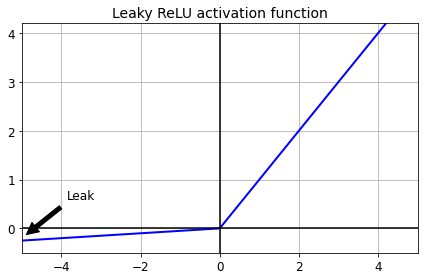

In [ ]:
plt.plot(z, Leaky_ReLU(z, 0.05), 'b-', linewidth = 2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')

plt.grid(True)

props = dict(facecolor = 'black', shrink = 0.1)
plt.annotate('Leak', xytext = (-3.5, 0.6), xy = (-5, -0.2), arrowprops = props, fontsize = 12, ha = 'center')

plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()


In [ ]:
[act for act in dir(keras.activations) if not act.startswith('_')]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [ ]:
[act for act in dir(keras.layers) if 'relu' in act.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

#### Train a neural network on Fashion MNIST using the LeakyReLU

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
tf.random.set_seed(2021)
np.random.seed(2021)

model = keras.models.Sequential([
                        keras.layers.Flatten(input_shape = [28, 28]),
                        keras.layers.Dense(300, kernel_initializer= 'he_normal'),
                        keras.layers.LeakyReLU(),
                        keras.layers.Dense(100, kernel_initializer= 'he_normal'),
                        keras.layers.LeakyReLU(),
                        keras.layers.Dense(10, activation = 'softmax')

                                 ])

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = keras.optimizers.SGD(lr = 1e-3),
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3042 - accuracy: 0.6112 - val_loss: 0.8641 - val_accuracy: 0.7344
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7818 - accuracy: 0.7517 - val_loss: 0.6945 - val_accuracy: 0.7754
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6698 - accuracy: 0.7842 - val_loss: 0.6245 - val_accuracy: 0.7974
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6123 - accuracy: 0.7996 - val_loss: 0.5769 - val_accuracy: 0.8098
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5748 - accuracy: 0.8093 - val_loss: 0.5484 - val_accuracy: 0.8196
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5485 - accuracy: 0.8156 - val_loss: 0.5271 - val_accuracy: 0.8250
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5287 - accuracy: 0.8214 - val_loss: 0.5103 - val_accuracy:

#### Train a neural network on Fashion MNIST using the PReLU

In [ ]:
tf.random.set_seed(2021)
np.random.seed(2021)

model = keras.models.Sequential([
                      keras.layers.Flatten(input_shape = [28, 28]),
                      keras.layers.Dense(300, kernel_initializer = 'he_normal'),
                      keras.layers.PReLU(),
                      keras.layers.Dense(100, kernel_initializer = 'he_normal'),
                      keras.layers.PReLU(),
                      keras.layers.Dense(10, activation = 'softmax'),
])

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = keras.optimizers.SGD(lr = 1e-3),
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.fit(X_train, y_train, epochs = 10, 
          validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3796 - accuracy: 0.6016 - val_loss: 0.9167 - val_accuracy: 0.7174
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8213 - accuracy: 0.7390 - val_loss: 0.7208 - val_accuracy: 0.7754
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6930 - accuracy: 0.7781 - val_loss: 0.6402 - val_accuracy: 0.7940
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6277 - accuracy: 0.7971 - val_loss: 0.5877 - val_accuracy: 0.8106
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5858 - accuracy: 0.8075 - val_loss: 0.5556 - val_accuracy: 0.8170
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5567 - accuracy: 0.8144 - val_loss: 0.5318 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5346 - accuracy: 0.8208 - val_loss: 0.5129 - val_accuracy:

### <font color='#1177EB'>**(2) Exponential Linear Unit (ELU)**</h3></font>

* ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes.

In [ ]:
def ELU (z, alpha = 1):
  return np.where(z<0, alpha * (np.exp(z) - 1 ), z)

Saving figure elu_plot


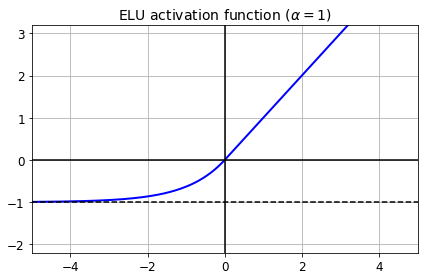

In [ ]:

plt.plot(z, ELU(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

#### Train a neural network on Fashion MNIST using Keras ELU activation function.

In [ ]:
keras.layers.Dense(10, activation = 'ELU')


### <font color='#1177EB'>**(3) Self-normalize Exponential Linear Unit (SELU)** </h3></font>

* The self-normalizing property of the SELU activation function is easily broken: you cannot use ℓ1 or ℓ2 regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize). However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions.

<img src='https://miro.medium.com/max/793/1*Q_lez8e2mP7MdSZf-O5bKw.png' width = '350' height = '80' />
<h3>

- α and λ are not hyperparameters to make decisions about.
- α and λ are derived from the inputs.
- For standard scaled inputs (mean 0, stddev 1), the values are α=1.6732, λ=1.0507.

* Every hidden layer’s weights must also be initialized using **LeCun normal** initialization. In Keras, this means setting .kernel_initializer="lecun_normal".

* The output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem.





In [ ]:

from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [ ]:
def SELU(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * ELU(z, alpha)

In [ ]:
plt.plot(z, SELU(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

NameError: ignored

#### Train a neural network on Fashion MNIST using the Keras SELU activation function.

In [ ]:
np.random.seed(2021)
Z = np.random.normal(size = (500, 100))     # standardized inputs

for layer in range(1000):
  W = np.random.normal(size = (100, 100), scale = np.sqrt(1/100) )   # LeCun initialization
  Z = SELU(np.dot(Z, W))
  means = np.mean(Z, axis = 0).mean()
  stds = np.std(Z, axis = 0).mean()

  if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))


In [ ]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

#### Create a neural net for Fashion MNIST with 100 hidden layers, using the SELU activation function

In [ ]:
np.random.seed(2021)
tf.random.set_seed(2021)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

Do not forget to scale the inputs to mean 0 and standard deviation 1

In [ ]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

### <font color='#1177EB'>**(4) Recifier Linear Unit (ReLU)** </h3></font>
Now let's use ReLU

In [ ]:
np.random.seed(2021)
tf.random.set_seed(2021)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 27s 14ms/step - loss: 2.0191 - accuracy: 0.2141 - val_loss: 1.8372 - val_accuracy: 0.3370
Epoch 2/5
1719/1719 [==============================] - 24s 14ms/step - loss: 1.6313 - accuracy: 0.3697 - val_loss: 1.4239 - val_accuracy: 0.4150
Epoch 3/5
1719/1719 [==============================] - 24s 14ms/step - loss: 1.1691 - accuracy: 0.5272 - val_loss: 0.9963 - val_accuracy: 0.6052
Epoch 4/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.9202 - accuracy: 0.6497 - val_loss: 0.8392 - val_accuracy: 0.6800
Epoch 5/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.9790 - accuracy: 0.6181 - val_loss: 0.8130 - val_accuracy: 0.6896


## <font color='#E38916'> BatchNormalization </font> 

* BN just standardizes its inputs then rescales and offsets them
* It improves the learning speed of Neural Networks and provides regularization, avoiding overfitting.
* Batch Norm – in the image represented with a red line – is applied to the neurons’ output just **before applying the activation function**. Usually, a neuron without Batch Norm would be computed as follows:
<img src='https://www.baeldung.com/wp-content/uploads/sites/4/2020/10/neural-network.png' width = '350' height = '150' />
<h3>

<img src='https://miro.medium.com/max/1274/1*szni_ME6vnFnkBvqtne3RQ.png' width = '400' height = '300' /><h3>

Another important hyperparameter is axis: 
* It determines which axis should be normalized. It defaults to –1, meaning that by default it will normalize the last axis [batch size, features] (after flatten) 

* If we move the first BN layer before the Flatten layer [batch size, height, width], therefore the BN layer will compute 28 means and 28 standard deviations, then you should set axis=[1, 2].

* it uses batch statistics during training, and the “final” statistics after training.



In [ ]:
model = keras.models.Sequential([
          keras.layers.Flatten(input_shape = [28, 28]),
          keras.layers.BatchNormalization(),
          keras.layers.Dense(300, activation = 'relu'),
           keras.layers.BatchNormalization(),
          keras.layers.Dense(300, activation = 'relu'),
           keras.layers.BatchNormalization(),
          keras.layers.Dense(10, activation = 'softmax'),

])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_218 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_219 (Dense)            (None, 300)               90300     
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
dense_220 (Dense)            (None, 10)               

In [ ]:
bn1 = model.layers[1]
[ (var.name, var.trainable) for var in bn1.variables ]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = keras.optimizers.SGD(lr = 1e-3),
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit (X_train, y_train, epochs = 10, 
                     validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.8146 - accuracy: 0.7234 - val_loss: 0.5233 - val_accuracy: 0.8230
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5463 - accuracy: 0.8091 - val_loss: 0.4539 - val_accuracy: 0.8440
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4856 - accuracy: 0.8279 - val_loss: 0.4186 - val_accuracy: 0.8554
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4562 - accuracy: 0.8391 - val_loss: 0.3997 - val_accuracy: 0.8616
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4337 - accuracy: 0.8468 - val_loss: 0.3874 - val_accuracy: 0.8648
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4187 - accuracy: 0.8537 - val_loss: 0.3794 - val_accuracy: 0.8678
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4001 - accuracy: 0.8573 - val_loss: 0.3706 - val_accuracy


* Sometimes applying BN before the activation function works better (there's a debate on this topic).

* Moreover, the layer before a BatchNormalization layer does not need to have bias terms, since the BatchNormalization layer some as well, it would be a waste of parameters, so you can set `use_bias=False` when creating those layers


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias = False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_221 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_222 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)              

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.0473 - accuracy: 0.6763 - val_loss: 0.6773 - val_accuracy: 0.7882
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6763 - accuracy: 0.7828 - val_loss: 0.5627 - val_accuracy: 0.8156
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5891 - accuracy: 0.8043 - val_loss: 0.5052 - val_accuracy: 0.8298
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5436 - accuracy: 0.8186 - val_loss: 0.4718 - val_accuracy: 0.8412
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5139 - accuracy: 0.8268 - val_loss: 0.4497 - val_accuracy: 0.8514
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4926 - accuracy: 0.8322 - val_loss: 0.4317 - val_accuracy: 0.8560
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4712 - accuracy: 0.8389 - val_loss: 0.4174 - val_accuracy:

## <font color='#E38916'> Gradient Clipping </font> 

Another popular technique to lessen the exploding gradients problem is to simply clip the gradients during backpropagation so that they never exceed some threshold.

**Gradient value clipping** involves clipping the derivatives of the loss function to have a given value if a gradient value is less than a negative threshold or more than the positive threshold.

> For example, we could specify a norm of 0.5, meaning that if a gradient value was less than -0.5, it is set to -0.5 and if it is more than 0.5, then it will be set to 0.5.


**Gradient norm scaling** involves changing the derivatives of the loss function to have a given vector norm when the L2 vector norm (sum of the squared values) of the gradient vector exceeds a threshold value.

> For example, we could specify a norm of 1.0, meaning that if the vector norm for a gradient exceeds 1.0, then <font color='#169DE3'>the values in the vector will be rescaled </font>so that the norm of the vector equals 1.0.

In [ ]:
optimizer = keras.optimizers.SGD(clipvalue = 1.0)

In [ ]:
optimizer = keras.optimizers.SGD(clipnorm = 1.0)

#<font color='#169DE3'>Reusing Pretrained Layers
</font> 



## <font color='#E38916'> Transfer Learning With Keras </font> 


Let's split the fashion MNIST training set in two:

`X_train_A`: all images of all items except for **sandals** and **shirts** (classes 5 and 6).

`X_train_B`: a much smaller training set of just the first 200 images of **sandals** or **shirts**.
The validation set and the test set are also split this way, but without restricting the number of images.

- We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). 

- We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts).
- However, since we are using Dense layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).

In [ ]:
def split_dataset (X, y):
  y_5_or_6 = (y == 5) | (y == 6)
  y_A = y[~y_5_or_6]
  y_A[y_A > 6] -= 2
  y_B = (y[y_5_or_6] == 6).astype(np.float32)

  return ( (X[~y_5_or_6], y_A) , (X[y_5_or_6], y_B) )

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)

X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
print(X_train_A.shape)
print(X_train_B.shape)

(43986, 28, 28)
(200, 28, 28)


In [ ]:
y_train_A[:20]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3],
      dtype=uint8)

In [ ]:
y_train_B[:20]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)

In [ ]:
tf.random.set_seed(2021)
np.random.seed(2021)

In [ ]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28,28]))

for n_hidden in (300, 100, 50, 50, 50, 50):
  model_A.add(keras.layers.Dense(n_hidden, activation = 'relu') )

model_A.add(keras.layers.Dense(8, activation = 'softmax') )

In [ ]:
model_A.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = keras.optimizers.SGD(lr = 1e-3),
                metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model_A.fit(X_train_A, y_train_A, epochs = 20,
                      validation_data = (X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 4s 3ms/step - loss: 1.8574 - accuracy: 0.3289 - val_loss: 1.5290 - val_accuracy: 0.5610
Epoch 2/20
1375/1375 [==============================] - 4s 3ms/step - loss: 1.1090 - accuracy: 0.7030 - val_loss: 0.7086 - val_accuracy: 0.8191
Epoch 3/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.5533 - accuracy: 0.8360 - val_loss: 0.4568 - val_accuracy: 0.8530
Epoch 4/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.4284 - accuracy: 0.8586 - val_loss: 0.4014 - val_accuracy: 0.8642
Epoch 5/20
1375/1375 [==============================] - 3s 3ms/step - loss: 0.3905 - accuracy: 0.8676 - val_loss: 0.3709 - val_accuracy: 0.8767
Epoch 6/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3693 - accuracy: 0.8741 - val_loss: 0.3729 - val_accuracy: 0.8722
Epoch 7/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3544 - accuracy: 0.8784 - val_loss: 0.3461 - val_accuracy:

In [ ]:
model_A.save('my_model_A.h5')

In [ ]:
model_B=keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape = [28, 28]))

for n_hidden in (300, 100, 50, 50, 50):
  model_B.add(keras.layers.Dense(n_hidden, activation = 'selu'))

model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 86ms/step - loss: 0.5072 - accuracy: 0.7250 - val_loss: 0.4481 - val_accuracy: 0.8063
Epoch 2/20
7/7 [==============================] - 0s 12ms/step - loss: 0.3985 - accuracy: 0.8500 - val_loss: 0.3685 - val_accuracy: 0.9067
Epoch 3/20
7/7 [==============================] - 0s 12ms/step - loss: 0.3271 - accuracy: 0.9200 - val_loss: 0.3134 - val_accuracy: 0.9371
Epoch 4/20
7/7 [==============================] - 0s 12ms/step - loss: 0.2775 - accuracy: 0.9500 - val_loss: 0.2716 - val_accuracy: 0.9473
Epoch 5/20
7/7 [==============================] - 0s 15ms/step - loss: 0.2389 - accuracy: 0.9650 - val_loss: 0.2406 - val_accuracy: 0.9604
Epoch 6/20
7/7 [==============================] - 0s 15ms/step - loss: 0.2093 - accuracy: 0.9700 - val_loss: 0.2161 - val_accuracy: 0.9665
Epoch 7/20
7/7 [==============================] - 0s 15ms/step - loss: 0.1863 - accuracy: 0.9850 - val_loss: 0.1955 - val_accuracy: 0.9746
Epoch 8/20
7/7 [===========

In [ ]:
model_A = keras.models.load_model('my_model_A.h5')
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs = 4,
                           validation_data = (X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 33ms/step - loss: 3.7633 - accuracy: 0.5050 - val_loss: 3.3772 - val_accuracy: 0.5000
Epoch 2/4
7/7 [==============================] - 0s 11ms/step - loss: 3.1112 - accuracy: 0.5050 - val_loss: 2.7229 - val_accuracy: 0.5000
Epoch 3/4
7/7 [==============================] - 0s 14ms/step - loss: 2.4656 - accuracy: 0.5050 - val_loss: 2.1185 - val_accuracy: 0.5000
Epoch 4/4
7/7 [==============================] - 0s 11ms/step - loss: 1.8816 - accuracy: 0.5050 - val_loss: 1.5539 - val_accuracy: 0.5081


In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/16
7/7 [==============================] - 1s 34ms/step - loss: 1.0165 - accuracy: 0.6250 - val_loss: 0.5515 - val_accuracy: 0.7606
Epoch 2/16
7/7 [==============================] - 0s 15ms/step - loss: 0.4656 - accuracy: 0.8200 - val_loss: 0.4013 - val_accuracy: 0.9006
Epoch 3/16
7/7 [==============================] - 0s 16ms/step - loss: 0.3654 - accuracy: 0.9100 - val_loss: 0.3384 - val_accuracy: 0.9422
Epoch 4/16
7/7 [==============================] - 0s 11ms/step - loss: 0.3149 - accuracy: 0.9450 - val_loss: 0.2995 - val_accuracy: 0.9584
Epoch 5/16
7/7 [==============================] - 0s 15ms/step - loss: 0.2790 - accuracy: 0.9550 - val_loss: 0.2685 - val_accuracy: 0.9716
Epoch 6/16
7/7 [==============================] - 0s 10ms/step - loss: 0.2503 - accuracy: 0.9750 - val_loss: 0.2444 - val_accuracy: 0.9757
Epoch 7/16
7/7 [==============================] - 0s 15ms/step - loss: 0.2277 - accuracy: 0.9800 - val_loss: 0.2248 - val_accuracy: 0.9797
Epoch 8/16
7/7 [===========

In [ ]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 0.9905


[0.08537761121988297, 0.9904999732971191]

In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.1317 - accuracy: 0.9960


[0.13165438175201416, 0.9959999918937683]

#<font color='#169DE3'> Optimizers
</font> 


Optimization algorithms are responsible for reducing losses and provide most accurate results possible. 

<img src='https://miro.medium.com/max/1204/1*iUJJUT_8oDcmF4y0bCIBFQ.png' width = '600' height = '600' />
<h3 align="center">

## <font color='#E38916'> (1) Gradient Descent </font> 
It starts from a random point on the function and traverses down its slope in steps until it reaches lowest point of that function.
- Simply updates the weights $θ$ by directly subtracting the gradient of the cost function $J(θ)$ with regards to the weights $∇_{\theta}J(θ)$ multiplied by the learning rate. The equation is $${\theta}  \leftarrow {\theta} - η.∇_{\theta}J(θ)$$ It does not care about what the earlier gradients were. If the local gradient is tiny, it goes very slowly.

- Drawback : 
   - There are chances the iteration values may get stuck at local minima or saddle point and never converge to minima.
   - The entire data set is loaded at a time. This makes it computationally intensive.


<img src='https://miro.medium.com/max/625/0*mLgI-qpU1r_fmoIr' width = '400' height = '300' />
<h3 align="center">




## <font color='#E38916'> (2) Stochastic Gradient Descent (SGD) </font> 
SGD tries to overcome the disadvantage of computationally intensive by computing the derivative of one point at a time.

* Drawback : 
   -  Due to this fact, SGD takes more number of iterations compared to GD to reach minimum.
   - contains some noise when compared to Gradient Descent. 
   - As SGD computes derivatives of only 1 point at a time, the time taken to complete one epoch is large compared to Gradient Descent algorithm.


## <font color='#E38916'> (3) Mini Batch — Stochastic Gradient Descent </font> 
It overcomes the time-consuming complexity of SGD by taking a batch of points / subset of points from dataset to compute derivative.

* Drawback : 
   - The update of weights in much noisier because the derivative is not always towards minima.
   - the number iterations to achieve minima in MB-SGD is large compared to GD and is computationally expensive.


## <font color='#E38916'> (4) Adaptive Optimizers </font>

Adaptive Optimization Algorithms are gaining popularity due to their ability to converge swiftly. These algorithms use statistics from previous iterations to speed up the process of convergence.

### <font color='#0E9B60'> (4.1) Momentum based Optimizer </font>

If this history element is included in the next updates, then it can speed the whole process and this is what **momentum** means in this optimizer. 

- This element depends on the `previous value`, `learning rate`, and a new parameter called `beta`, which controls this history update. The update rule will be something like $θ  \leftarrow θ + m$, where m is the history element.

- To simulate some sort of friction mechanism and prevent the momentum from growing too large, the algorithm introduces a new hyperparameter $β$, simply called the momentum

- The history element (momentum vector): 
$$m  \leftarrow β.m - η.∇_{\theta}J(θ)$$

    - At each iteration, it subtracts the local gradient from the momentum vector m.
    - Then updates the weights by simply adding this momentum vector
    - The momentum $(β)$ must be set between 0 (high friction) and 1 (no friction). A typical momentum value is 0.9 to prevent the momentum from growing too large.

<img src='https://miro.medium.com/max/688/0*w8oQV8LbRCQj3AA2.png' width = '500' height = '300' />
<h3>

> Due to the momentum, the optimizer may overshoot a bit, then come back, overshoot again, and oscillate like this many times before stabilizing at the minimum. This is one of the reasons why it is good to have a bit of friction in the system: it gets rid of these oscillations and thus speeds up convergence.






In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### <font color='#0E9B60'>(4.2) Nesterov Accelerated Gradient(NAG) </font>

The idea of (NAG), is to measure the gradient of the cost function not at the **local** position but slightly **ahead** in the direction of the momentum.

- The algorithm have an approximate idea of the parameter values in its next iteration.

Cost function: 
$$m  \leftarrow β.m - η.∇_{\theta}J(θ + β.m )$$
$$θ  \leftarrow θ + m$$

- The only difference from vanilla Momentum optimization is that the gradient is measured at $θ + βm$ rather than at $θ$.

- By using NAG technique, we are now able to adapt error function with the help of previous and future values and thus eventually speed up the convergence

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### <font color='#0E9B60'>(4.3) AdaGrad Optimizer </font>

Adaptive Gradient as the name suggests adopts the learning rate of parameters by updating it at each iteration depending on the position it is present.

- Technically it acts on learning rate parameter by <font color='#0F3EEA'> dividing the learning rate by the square root of gamma </font>, which is the summation of all gradients squared.

- EX - by adapting  <font color='#0F3EEA'> slower </font> learning rates when features are occurring <font color='#CC01AC'>frequently </font> and adapting  <font color='#0F3EEA'>higher</font> learning rate when features are  <font color='#CC01AC'>infrequent</font>.

- Cost function: 
$$s  \leftarrow s + ∇_{\theta}J(θ)⊗∇_{\theta}J(θ)$$
$$θ  \leftarrow θ - η.∇_{\theta}J(θ)⊘\sqrt{s+ϵ}$$

- Drawback : 
   - If every added term is positive$(s)$, the accumulated sum keeps growing during the training. This makes the learning rate to shrink and eventually become small. 
   - This method takes a lot of u-turns and oscillates in and out in the minima valley adding to the total time.

  > The learning rate gets scaled down so much that the algorithm ends up stopping entirely before reaching the global optimum. 
  
  >So even though Keras has an Adagrad optimizer, you should not use it to train deep neural networks (it may be efficient for simpler tasks such as Linear Regression, though)

 > 

In [ ]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### <font color='#0E9B60'>(4.4) AdaDelta Optimizer </font>

An extension of AdaGrad that seeks to reduce its monotonically decreasing learning rate. 

- Instead of summing all the past gradients, AdaDelta restricts the no. of summation values to a limit (w).

- In AdaDelta, the sum of past gradients (w) is defined as “Decaying Average of all past squared gradients”.


### <font color='#0E9B60'>(4.5) RMSProp Optimizer</font> 

Root Mean Squared Prop is another adaptive learning rate method that tries to improve AdaGrad

- The first step in both AdaGrad and RMSProp is identical. RMSProp simply divides learning rate by an **exponentially decaying average.**

$$s \leftarrow  β.s + (1 − β).∇_θJ(θ) ⊗ ∇_θJ(θ)$$
$$θ  \leftarrow θ − η.∇_θJ(θ) ⊘ \sqrt{s + ϵ}$$

- The decay rate β is typically set to 0.9. Yes, it is once again a new hyperparameter, but this default value often works well, so you may not need to tune it at all.


In [ ]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### <font color='#0E9B60'>(4.6) Adam Optimizater</font> 

It is a combination of **RMSProp** and **Momentum**: just like Momentum optimization it keeps track of an exponentially decaying average of <font color='#0F49E3'>past gradients</font>, and just like RMSProp it keeps track of an exponentially decaying average of <font color='#0F49E3'> past squared gradients</font>.


$$m \leftarrow β_1.m + (1 − β_1).∇_θJ(θ)$$

$$s \leftarrow  β_2.s + (1 − β_2).∇_θJ(θ) ⊗ ∇_θJ(θ)$$

$$\hat{m} \leftarrow \frac{m}{1 − β_1^t}$$

$$\hat{s} \leftarrow \frac{s}{1 − β_2^t}$$

$$θ  \leftarrow θ − η.\hat{m} ⊘ \sqrt{\hat{s} + ϵ}$$

- The momentum decay hyperparameter β1
is typically initialized to $0.9$.
- The scaling decay hyperparameter β2 is often initialized to $0.999$.
- Term ϵ is usually initialized to a tiny number such as $10^{-7}$.


In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### <font color='#0E9B60'>(4.6) Nadam Optimizater</font> 

Nadam optimization18 is more important: it is simply Adam optimization plus the Nesterov trick, so it will often converge slightly faster than Adam.

In [ ]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## <font color='#E38916'> Optimizers Behaviours Graph</font>

<img src='https://miro.medium.com/max/775/0*j_-Ea5yQkcHYDZgC.gif' width = '600' height = '400' />
<h3>



#<font color='#169DE3'> Learning Rate Scheduling
</font> 
Learning rate schedules seek to adjust the learning rate during training by reducing the learning rate according to a pre-defined schedule.

<img src='https://www.pyimagesearch.com/wp-content/uploads/2019/07/keras_clr_learning_rate_variations.png' width = '600' height = '200' />

- If you set it way <font color='#0F49E3'>too high</font> , training may
actually <font color='#B20FE3'>diverge</font> . 

- If you set it <font color='#0F49E3'>too low</font> , training will eventually <font color='#B20FE3'>converge</font>  to the optimum, but it will take a very long time. 

- If you set it <font color='#0F49E3'>slightly too high</font> , it will make progress very quickly at first, but it will end up <font color='#B20FE3'>dancing</font>  around the optimum, never really settling down. 

<img src='https://miro.medium.com/max/918/0*uIa_Dz3czXO5iWyI.' width = '450' height = '300' />
<h3>

These strategies are called learning schedules:



## <font color='#E38916'> Constant Learning Rate
Constant learning rate is the default learning rate schedule in SGD optimizer in Keras. Momentum and decay rate are both set to zero by default.


```
keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
```



## <font color='#E38916'> Linear decay Scheduling </font>
The linear schedule decreases the learning rate by the same amount (decrement) every epoch. 
- Depending on the **Decrement per epoch**
- The learning rate can reach zero quite **fast**.

$$\text{η}(epoch) = {η_0} - ({Epoch} * \text{Decrement per epoch})$$


<img src='https://peltarion.com/static/linear_deacy_learning_rate_schedule_a.png' width = '350' height = '200' />
<h3>




## <font color='#E38916'> The Standard Decay scheduling</font>

$$η(t) = \frac{η_0}{(1 + decay* iteration)}$$

$$decay = \frac{η_0}{\text{n_epochs}}$$

Keras updates the standard decay after every epoch. 

Ex: we have a total of 50,000 training images. If we use :
 * batch size of 64 
 * number of epochs = 40
 * ${η_0}=0.01$.


     * Step = 50,000 / 64 = 782  (steps/epochs)
     * Total of 782 weight updates need to be applied before an epoch completes.
     * decay = 0.01 / 40 = 0.00025
     * η(1) = 0.01 * [1.0 / {1.0 + (0.00025*1*782) }]
     * η(2) = 0.01 * [1.0 / {1.0 + (0.00025*2*782) }]  and so on.




In [ ]:
model = keras.models.Sequential([
            keras.layers.Flatten(input_shape = [28, 28]),
            keras.layers.Dense(300, activation='selu', kernel_initializer = 'lecun_normal'),
            keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
            keras.layers.Dense(10, activation="softmax")
])

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate = 0.01, decay = 1e-3)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [ ]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs = n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

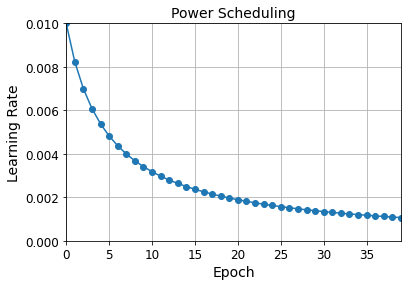

In [ ]:
import math 
'''The decay is the inverse of steps
   (the number of steps it takes to divide the learning rate by one more unit),
    and Keras assumes that c is equal to 1'''
n_epochs = 40
learning_rate = 0.01
decay = learning_rate / n_epochs
batch_size = 64
n_steps_per_epoch = len(X_train)// batch_size
epochs_i = np.arange(n_epochs)                               

lrs = learning_rate / (1+(decay * epochs_i * n_steps_per_epoch))

plt.plot(epochs_i, lrs, 'o-')
plt.axis([0, n_epochs -1, 0, 0.01])

plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()


## <font color='#E38916'> Exponential Decay scheduling </font>
Set the learning rate to: 
$$η(t) = η_0.(\text{0.1})^\frac{step}{\text{decay_steps}}$$.

While power scheduling reduces the learning rate more and more slowly, exponential scheduling keeps slashing it by a factor of 10 every dacay_steps.


### <font color='#0E9B60'> Exponential Decay Scheduling Using **user defined function**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [ ]:
# def expontial_decay_fn (epoch):
#   return 0.01 * 0.1**(epochs / 20)

In [ ]:
def exponential_decay(lr0, steps):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / steps)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, steps=20)

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/40
1719/1719 [==============================] - 8s 5ms/step - loss: 1.9970 - accuracy: 0.2582 - val_loss: 1.9902 - val_accuracy: 0.2420
Epoch 2/40
1719/1719 [==============================] - 8s 5ms/step - loss: 2.0203 - accuracy: 0.2378 - val_loss: 2.0801 - val_accuracy: 0.2826
Epoch 3/40
1719/1719 [==============================] - 8s 5ms/step - loss: 1.9192 - accuracy: 0.2713 - val_loss: 1.9632 - val_accuracy: 0.2764
Epoch 4/40
1719/1719 [==============================] - 8s 4ms/step - loss: 1.9058 - accuracy: 0.2698 - val_loss: 1.8836 - val_accuracy: 0.2812
Epoch 5/40
1719/1719 [==============================] - 8s 4ms/step - loss: 1.8802 - accuracy: 0.2728 - val_loss: 2.0399 - val_accuracy: 0.2866
Epoch 6/40
1719/1719 [==============================] - 8s 5ms/step - loss: 1.8736 - accuracy: 0.2737 - val_loss: 1.9387 - val_accuracy: 0.2726
Epoch 7/40
1719/1719 [==============================] - 8s 5ms/step - loss: 1.8295 - accuracy: 0.2872 - val_loss: 1.9101 - val_accuracy:

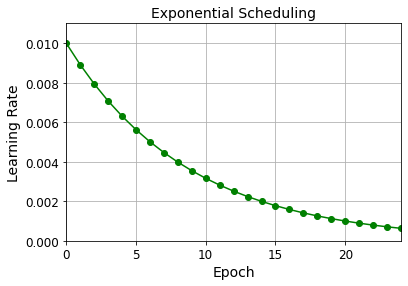

In [ ]:
plt.plot(history.epoch, history.history['lr'], 'go-')
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### <font color='#0E9B60'> Expontial Decay Scheduling Using **keras backend class**

If you want to update the learning rate at each iteration rather than at each epoch, you must write your own callback class:

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])


In [ ]:

K = keras.backend

class ExponentialDecay (keras.callbacks.Callback):
  def __init__(self, iterations = 40000):
    super().__init__()
    self.iterations = iterations

  def on_batch_begin (self, batch, logs = None):
    lr = K.get_value(self.model.optimizer.lr)
    K.set_value(self.model.optimizer.lr, lr*0.1**(1/iterations))

  def on_epoch_end(self, epoch, logs = None):
    logs = logs or {}
    logs['lr'] = K.get_value(self.model.optimizer.lr)

In [ ]:
lr0 = 0.01
n_epochs = 25
batch_size = 32

optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

iterations = n_epochs * (len(X_train) // batch_size)      # number of steps in 20 epochs
exp_decay = ExponentialDecay(iterations)


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 10s 5ms/step - loss: 0.8160 - accuracy: 0.7610 - val_loss: 0.6211 - val_accuracy: 0.8328
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8180 - accuracy: 0.7763 - val_loss: 0.8561 - val_accuracy: 0.7484
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6993 - accuracy: 0.7907 - val_loss: 0.7600 - val_accuracy: 0.8262
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6190 - accuracy: 0.8248 - val_loss: 0.7243 - val_accuracy: 0.8028
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5446 - accuracy: 0.8423 - val_loss: 0.6026 - val_accuracy: 0.8560
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5017 - accuracy: 0.8530 - val_loss: 0.7033 - val_accuracy: 0.7812
Epoch 7/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4715 - accuracy: 0.8608 - val_loss: 0.6484 - val_accuracy

In [ ]:
step_i = np.arange(iterations)
lrs = lr0 * 0.1**(step_i / iterations)

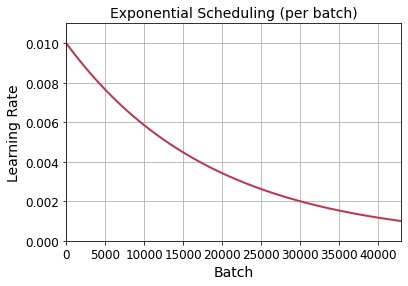

In [ ]:
plt.plot(step_i, lrs, "-", linewidth=2,color='#BC3651')
plt.axis([0, iterations - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

### <font color='#0E9B60'> Exponential Decay Scheduling Using **tf.keras**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
batch_size = 32
n_epochs = 25
lr0 = 0.01
iterations = n_epochs * len(X_train) // batch_size  # number of steps in 20 epochs (batch size = 32)

learning_rate = keras.optimizers.schedules.ExponentialDecay(lr0, iterations, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4849 - accuracy: 0.8301 - val_loss: 0.4077 - val_accuracy: 0.8596
Epoch 2/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3776 - accuracy: 0.8663 - val_loss: 0.3809 - val_accuracy: 0.8668
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3441 - accuracy: 0.8785 - val_loss: 0.3662 - val_accuracy: 0.8698
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3213 - accuracy: 0.8855 - val_loss: 0.3550 - val_accuracy: 0.8742
Epoch 5/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3042 - accuracy: 0.8915 - val_loss: 0.3504 - val_accuracy: 0.8770
Epoch 6/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2901 - accuracy: 0.8970 - val_loss: 0.3481 - val_accuracy: 0.8776
Epoch 7/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2790 - accuracy: 0.9005 - val_loss: 0.3365 - val_accuracy:

## <font color='#E38916'> Piecewise constant scheduling</font>
Use a constant learning rate for a number of epochs.
- e.g. $η_0$ for 5 epochs.
- e.g. $η_1$= 0.001 for 50 epochs.



### <font color='#0E9B60'> Piecewise Constant Scheduling Using **user defined function**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
def piecewise_constant(boundaries, lr_values):
  boundaries = np.array([0] + boundaries)
  lr_values = np.array(lr_values)

  def piecewise_constant_fn(epoch):
    return lr_values[np.argmax(boundaries > epoch) -1 ]
  return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="nadam", metrics=["accuracy"])


In [ ]:
n_epochs = 25

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

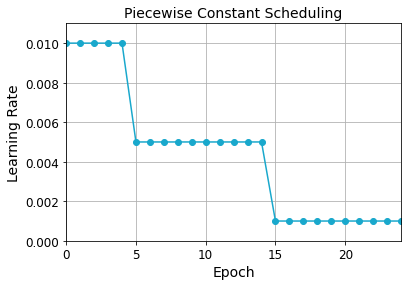

In [ ]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], 'o-',color = '#19A8CC')
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### <font color='#0E9B60'> Piecewise Scheduling Using **tk.keras**

In [ ]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=optimizer, metrics=["accuracy"])


In [ ]:
n_epochs = 25

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

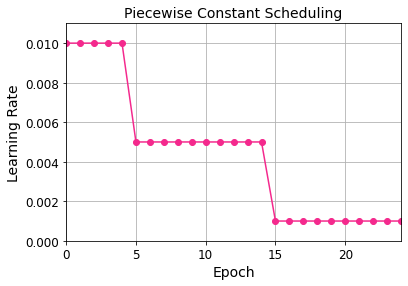

In [ ]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], 'o-', color = '#F4298D')
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## <font color='#E38916'> Performance scheduling </font>
Measure the validation error every N steps (just like for early stopping) and reduce the learning rate by a factor of λ when the error stops dropping.

- When `ReduceLROnPlateau` passes to `fit()` method it will multiply the learning rate by a factor (default = 0.5) whenever the best validation loss does not improve for a patience number (defaullt = 5) consecutive epochs

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience=5)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

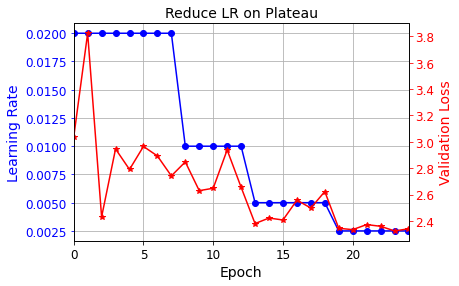

In [ ]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel('Epoch')
plt.ylabel('Learning Rate', color= 'b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history['val_loss'], 'r*-')
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors = 'r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

## <font color='#E38916'> One Cycle Scheduling </font>


> ### Why should we use Cyclical Learning Rates?

1. The first reason is that our network may become stuck in either saddle points or local minima.
2. Secondly, our model and optimizer may be very sensitive to our initial learning rate choice.

<img src='https://www.pyimagesearch.com/wp-content/uploads/2019/07/keras_clr_saddle_points.png' width = '350' height = '150' />
<h3>


> ### Now, instead of monotonically decreasing our learning rate, we instead:

1. Define the lower bound on our learning rate (called `"base_lr"`).
2. Define the upper bound on the learning rate (called the `"max_lr"`).
3. Allow the learning rate to oscillate back and forth between these two bounds when training, slowly increasing and decreasing the learning rate after every batch update.

> ### How do we use Cyclical Learning Rates?
In order to use this implementation we need to define a few values first:

1. **Batch size**: Number of training examples to use in a single forward and backward pass of the network during training.
2. **Batch/Iteration**: Number of weight updates per epoch (i.e., # of total training examples divided by the batch size).
3. **Cycle**: Number of iterations it takes for our learning rate to go from the lower bound, ascend to the upper bound, and then descend back to the lower bound again.

4. **Step size**: Number of iterations in a half cycle.
  * $\text{step_size} = (2 \space : \space 8) * \text{training_iterations_in_epoch} $(recommended) 
  * In practice, I have found that step sizes of either 4 or 8 work well in most situations.




In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [ ]:
# K = keras.backend

# class ExpontialLearningRate (keras.callbacks.Callback):
#   def __init__(self, factor):
#     self.factor = factor
#     self.rates = []
#     self.losses = []

#   def on_epoch_begin (self, epoch, logs = None):
#     self.prev_loss = 0

#   def on_batch_end (self, batch, logs = None):
#     '''The on_batch_end function is responsible for updating our learning rate 
#         after every batch is complete (i.e., both the forward and backward pass)
#     '''
#     batch_loss = logs['loss'] * (batch + 1) - self.prev_loss * batch
#     self.prev_loss = logs['loss']
    
#     self.rates.append(K.get_value(self.model.optimizer.lr))
#     self.losses.append(batch_loss)
    
#     K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)


In [ ]:
def find_learning_rate(model, X, y, epochs = 1, batch_size = 32, min_rate = 10**-5, max_rate = 10):
  
  init_weights = model.get_weights()
  iterations = (len(X) // batch_size) * epochs
  factor  = np.exp(np.log(max_rate / min_rate) / iterations)
  init_lr = K.get_value(model.optimizer.lr)
  K.set_value(model.optimizer.lr, min_rate)
  exp_lr = ExpontialLearningRate(factor)
  
  history = model.fit(X, y, epochs = epochs, batch_size=batch_size, callbacks=[exp_lr])

  K.set_value(model.optimizer.lr, init_lr)
  model.set_weights(init_weights)

  return exp_lr.rates, exp_lr.losses

In [ ]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [ ]:
tf.random.set_seed(2021)
np.random.seed(2021)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)


430/430 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.3693


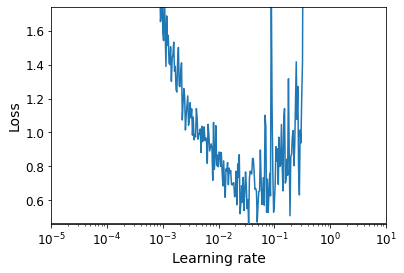

In [ ]:
plot_lr_vs_loss(rates, losses)

In [ ]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
      
        self.iterations = iterations    # total number of iterations including all epochs
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
        
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [ ]:

n_epochs = 25
onecycle = OneCycleScheduler( (len(X_train) // batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 3s 6ms/step - loss: 0.6573 - accuracy: 0.7725 - val_loss: 0.4837 - val_accuracy: 0.8340
Epoch 2/25
430/430 [==============================] - 2s 5ms/step - loss: 0.4585 - accuracy: 0.8389 - val_loss: 0.4377 - val_accuracy: 0.8516
Epoch 3/25
430/430 [==============================] - 2s 5ms/step - loss: 0.4126 - accuracy: 0.8555 - val_loss: 0.4023 - val_accuracy: 0.8632
Epoch 4/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3840 - accuracy: 0.8640 - val_loss: 0.3929 - val_accuracy: 0.8606
Epoch 5/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3623 - accuracy: 0.8711 - val_loss: 0.3838 - val_accuracy: 0.8660
Epoch 6/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3433 - accuracy: 0.8781 - val_loss: 0.3840 - val_accuracy: 0.8706
Epoch 7/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3301 - accuracy: 0.8809 - val_loss: 0.3632 - val_accuracy: 0.8748
Epoch 

#<font color='#169DE3'> Avoiding Overfitting Through Regularization </font> 

With so many parameters, the network has an incredible amount of freedom and can fit a huge variety of complex datasets. But this great **flexibility** also means that it is prone to **overfitting** the training set. We need regularization.

* We already implemented one of the best regularization techniques in [Chapter 10:](https://colab.research.google.com/drive/1WXvPA-bjgZaPwshDQ5BXSdark0tda-QG?usp=sharing) **early stopping**. 

* Moreover, even though **Batch Normalization** was designed to solve the vanishing/exploding gradients problems, is also acts like a pretty good regularizer. 



## <font color='#E38916'> ℓ1 and ℓ2 Regularization

Regularization is a process of introducing additional information in order to prevent overfitting. 

### <font color='#0E9B60'>  ℓ1 Regularization (Lasso Regression)
Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds **absolute value of magnitude** of coefficient as penalty term to the loss function.


* L1 regularization is the preferred choice when having a high number of features as it provides sparse solutions.

$$\text{Cost function (L1)} = \sum_{i=1}^{n}{({Y_i}-\hat{Y_i} )^2} + λ \sum_{j=1}^p{|{w_j}|}$$

$$ W_{new} = W - 	η . {Erorr(Y,\hat{Y})} +   λ\frac{d|w|}{dw} $$ 

* When w is positive, the regularization parameter (λ > 0) will make w to be least positive, by deducting λ from w.

$$ W_{new} = [W - 	η . {Erorr(Y,\hat{Y})}] -   λ$$ 

* When w is negative, the regularization parameter (λ < 0) will make w to be little negative, by summing λ to w.
$$ W_{new} = [W - 	η . {Erorr(Y,\hat{Y})} ]+   λ$$ 

### <font color='#0E9B60'>  ℓ2 Regularization ( Ridge Regression )
Ridge regression adds **squared magnitude** of coefficient as penalty term to the loss function. Here the highlighted part represents L2 regularization element.

* L2 regularization can deal with the multicollinearity (independent variables are highly correlated) problems through constricting the coefficient and by keeping all the variables.

زي مثلا الوقت الي اتبني فيه بيت متعلق اوي بعدد الغرف
لو استخدمنا الاولاني هيلغي تاثير الوقت لان مش هياثر علي السعر وهيلغي معاه عدد الرومز لان الاتنين مرتبطين ببعض وانا مش عاوز كده طبعا ف هنا بقي لازم استخدم النوع التاني دا 

* L2 regularization returns a non-sparse solution since the weights will be non-zero (although some may be close to 0).


* A major snag to consider when using L2 regularization is that it’s not robust to outliers. The squared terms will blow up the differences in the error of the outliers. The regularization would then attempt to fix this by penalizing the weights. 


$$\text{Cost function (L2)} = \sum_{i=1}^{n}{({Y_i}-\hat{Y_i} )^2} + λ \sum_{j=1}^p{{w_j}^2}$$

$$ W_{new} = W - 	η . {Erorr(Y,\hat{Y})} +   λ\frac{d/2}{dw} $$ 

* If lambda is **zero** then you can imagine we get back **OLS**.
$$ W_{new} = [W - 	η . {Erorr(Y,\hat{Y})} ] $$ 

* If lambda is **very large** then it will add too much weight and it will lead to **under-fitting**.
$$ W_{new} = [W - 	η . {Erorr(Y,\hat{Y})} ]+   2λw$$ 

---
###  <font color='#0E9B60'> The differences between L1 and L2 regularization:

* L1 regularization penalizes the sum of absolute values of the weights, whereas L2 regularization penalizes the sum of squares of the weights. 
The 
* L1 regularization solution is sparse. The L2 regularization solution is non-sparse.
* L2 regularization doesn’t perform feature selection, since weights are only reduced to values near 0 instead of 0. L1 regularization has built-in feature selection.
* L1 regularization is robust to outliers, L2 regularization is not. 


In [ ]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 14s 7ms/step - loss: 1.6092 - accuracy: 0.8119 - val_loss: 0.7155 - val_accuracy: 0.8270
Epoch 2/2
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7193 - accuracy: 0.8258 - val_loss: 0.6914 - val_accuracy: 0.8452


Since you will typically want to apply the same regularizer to all layers in your network, as well as the same activation function and the same initialization strategy in all hidden layers. To avoid this, you can try refactoring your code to use loops. Another option is to use Python’s `functools.partial() `function: **it lets you create a thin wrapper for any callable**.

In [ ]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 14s 8ms/step - loss: 1.6393 - accuracy: 0.8114 - val_loss: 0.7275 - val_accuracy: 0.8256
Epoch 2/2
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7187 - accuracy: 0.8263 - val_loss: 0.6853 - val_accuracy: 0.8382


## <font color='#E38916'> Dropout Regularization

* At every training step, every neuron has a probability p of being temporarily "dropped out", meaning it will be entirely **ignored** during this training step, but it may be **active** during the next step.
* The hyperparameter `p` is called the dropout rate, and it is typically set to 50%.
* Since each neuron can be either present or absent, there is a total of ${2}^N$ This is such a huge number that it is virtually impossible for the same neural network to be sampled twice.
possible networks. These neural networks are obviously not independent since they share many of their weights, but they are nevertheless all different. 

* The resulting neural network can be seen as an averaging ensemble of all these smaller neural networks.

<img src='https://www.oreilly.com/library/view/tensorflow-for-deep/9781491980446/assets/tfdl_0408.png' width = '400' height = '200' />

> If you observe that the model is overfitting, you can increase the dropout rate. Conversely, you should try decreasing the dropout rate if the model underfits the training set

> Dropout does tend to significantly slow down convergence, but it usually results in a much better model when tuned properly. So, it is generally well worth the extra time and effort.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 14s 7ms/step - loss: 0.5772 - accuracy: 0.8003 - val_loss: 0.3757 - val_accuracy: 0.8644
Epoch 2/2
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4245 - accuracy: 0.8445 - val_loss: 0.3700 - val_accuracy: 0.8670


### <font color='#0E9B60'> AlphaDropout
If you want to regularize a self-normalizing network based on the `SELU` activation function (as discussed earlier), you should use `AlphaDropout`: this is a variant of dropout.

In [ ]:
tf.random.set_seed(2021)
np.random.seed(2021)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
n_epochs = 20

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6616 - accuracy: 0.7585 - val_loss: 0.6497 - val_accuracy: 0.8322
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5556 - accuracy: 0.7945 - val_loss: 0.5668 - val_accuracy: 0.8448
Epoch 3/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5250 - accuracy: 0.8057 - val_loss: 0.5231 - val_accuracy: 0.8526
Epoch 4/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5085 - accuracy: 0.8115 - val_loss: 0.4807 - val_accuracy: 0.8638
Epoch 5/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4886 - accuracy: 0.8193 - val_loss: 0.5205 - val_accuracy: 0.8526
Epoch 6/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4827 - accuracy: 0.8204 - val_loss: 0.4878 - val_accuracy: 0.8620
Epoch 7/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4713 - accuracy: 0.8255 - val_loss: 0.4411 - val_accuracy:

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4809 - accuracy: 0.8635


[0.4809033274650574, 0.8634999990463257]

In [ ]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 3s 2ms/step - loss: 0.3578 - accuracy: 0.8853


[0.3577698767185211, 0.885345458984375]

In [ ]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 8s 4ms/step - loss: 0.4157 - accuracy: 0.8464


### <font color='#0E9B60'> Monte-Carlo (MC) Dropout


It shows that training a dropout network is mathematically equivalent to **approximate Bayesian** inference in a specific type of probabilistic model called <font color='#AB0124'> **a deep Gaussian Process**.


In [ ]:
with keras.backend.learning_phase_scope(1): # force training mode = dropout on 
  y_probas = np.stack([model.predict(X_test_scaled) for sample in range(100)])
  y_proba = y_probas.mean(axis=0)
  y_std = y_probas.std(axis=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:493: UserWarning: `tf.keras.backend.learning_phase_scope` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.learning_phase_scope` is deprecated and '


Since dropout is only active during training, the training loss is penalized compared to the validation loss, so comparing the two can be **misleading**. 

In particular, a model may be overfitting the training set and yet have similar training and validation losses. 


**1.** We first force training mode on, using the `fit() `method inside a `with keras.backend.learning_phase_scope(1)` block: <font color='#8C4DE1'>**this will force dropout to be active during both training and validation.**</font>

**2.** Since there are 10,000 instances in the test set, and 10 classes, this is a matrix of shape $[10000, 10]$. We stack 100 such matrices, so `y_probas` is an array of shape $[100, 10000, 10]$. 

**3.** Once we average over the first dimension $(axis=0)$, we get `y_proba`, an array of shape $[10000, 10]$, like we would get with a single prediction.

> The number of Monte Carlo samples you use (100 in this example) is a **hyperparameter** you can tweak. The higher it is, the more accurate the predictions and their uncertainty estimates will be.

In [ ]:
'''The model’s prediction for the first instance 
   in the test set, with dropout off
'''
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

The model seems almost certain that this image belongs to class 9.

In [ ]:

np.round(y_probas[:,:1], 2)

Apparently, when we activate dropout, the model is not sure anymore. It still seems to prefer class 9, but sometimes it hesitates with classes 5 (sandal) and 7 (sneaker), which makes sense given they’re all footwear.

طبعا علي حظي مطلعش الكلام دا هنا 

In [ ]:
np.round(y_proba[:1],2)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Apparently there’s quite a lot of variance in the probability estimates: if you were building a risk-sensitive system (e.g., a medical or financial system), you should probably treat such an uncertain prediction with extreme caution. You definitely would not treat it like a 99% confident prediction. Moreover, the model’s accuracy got a small boost from 86.8 to 86.9.


طبعا بردو علي حظي مطلعش كده بس لازم اكتب دا عشان اوضح الي عمله الدروب اوت ف البردكشن 

In [ ]:
'''Once we average over the first dimension, 
we get the following MC dropout predictions. '''

y_pred = np.argmax(y_proba, axis = 1)
print(y_pred[:1])
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(accuracy)

[9]
0.8652


We just sublass the Dropout layer and override the `call()` method to force its train ing argument to True.

- If you are creating a model from scratch, it’s just a matter of using MCDropout rather than `Dropout`. 

- But if you have a model that was already trained using Dropout, you need to create a new model, identical to the existing model except replacing the `Dropout` layers with `MCDropout`, then copy the existing model’s weights to your new model.

In [ ]:
class MCDroupout(keras.layers.Dropout):
  def call(self, inputs):
    return super().call(inputs, training = True)

class MCAlphaDroupout(keras.layers.AlphaDropout):
  def call(self, inputs):
    return super().call(inputs, training = True)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

''' The isinstance() function returns True if the specified 
    object is of the specified type, otherwise False.
'''

''' create a new model, identical to the existing model except 
   replacing the Dropout layers with MCDropout
'''
mc_model = keras.models.Sequential([
                 MCAlphaDroupout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
                 for layer in model.layers
])

In [ ]:
mc_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
mc_alpha_droupout (MCAlphaDr (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
mc_alpha_droupout_1 (MCAlpha (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
mc_alpha_droupout_2 (MCAlpha (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
'''Copy the existing model’s weights to your new model.'''
mc_model.set_weights(model.get_weights())

In [ ]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.26, 0.  , 0.67]],
      dtype=float32)

> In short, MC Dropout is a fantastic technique that boosts dropout models and provides better uncertainty estimates. And of course, since it is just regular dropout during training, it also acts like a regularizer

## <font color='#E38916'> Max-Norm Regularization

Max-norm regularization does not add a regularization loss term to the overall loss function. Instead, it is typically implemented by computing $∥w∥_2$
after each training step and clipping w if needed ($w \leftarrow \frac{r}{||w||_2}$).

* Reducing $r$ increases the amount of regularization and helps<font color='#A329F4'> **reduce overfitting**</font>. 
* Also help alleviate the vanishing/exploding gradients problems (if you are not using Batch Normalization).

In [ ]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [ ]:
from functools import partial

MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4752 - accuracy: 0.8340 - val_loss: 0.3989 - val_accuracy: 0.8662
Epoch 2/2
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3549 - accuracy: 0.8703 - val_loss: 0.3830 - val_accuracy: 0.8644


As we will see in **Chapter 12**, you can define your own custom constraint function if you ever need to, and use it as the `kernel_constraint`. 

You can also constrain the bias terms by setting the `bias_constraint` argument.

The `max_norm()` function has an axis argument that defaults to 0. A Dense layer usually has weights of shape $\text{[number of inputs, number of neurons]}$, so using $axis=0$ means that the max norm constraint will apply independently to each neuron’s weight vector. 

If you want to use max-norm with convolutional layers (see Chapter 14), make sure to set the `max_norm() `constraint’s axis argument appropriately (usually $axis=[0, 1, 2]$).